In [140]:
import numpy as np
import pandas as pd

In [141]:
d_train=pd.read_csv("train (1).csv")
d_test=pd.read_csv("test (1).csv")

In [142]:
d_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [144]:
d_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [145]:
d_train.drop(labels=["Name","PassengerId","Ticket","Cabin"],axis=1,inplace=True)
d_test.drop(labels=["Name","PassengerId","Ticket","Cabin"],axis=1,inplace=True)

In [146]:
d_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [147]:
d_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [148]:
d_train=pd.get_dummies(d_train,columns=["Sex"],prefix="Sex_")
d_train=pd.get_dummies(d_train,columns=["Embarked"],prefix="Embarked_")
d_test=pd.get_dummies(d_test,columns=["Sex"],prefix="Sex_")
d_test=pd.get_dummies(d_test,columns=["Embarked"],prefix="Embarked_")

In [149]:
d_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex__female,Sex__male,Embarked__C,Embarked__Q,Embarked__S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [150]:
d_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex__female,Sex__male,Embarked__C,Embarked__Q,Embarked__S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [151]:
X = d_train.loc[:, d_train.columns != 'Survived']
y = d_train['Survived']

In [152]:
X.shape

(891, 10)

In [153]:
d_test.shape

(418, 10)

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [155]:
print(X.isnull().sum())

Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Sex__female      0
Sex__male        0
Embarked__C      0
Embarked__Q      0
Embarked__S      0
dtype: int64


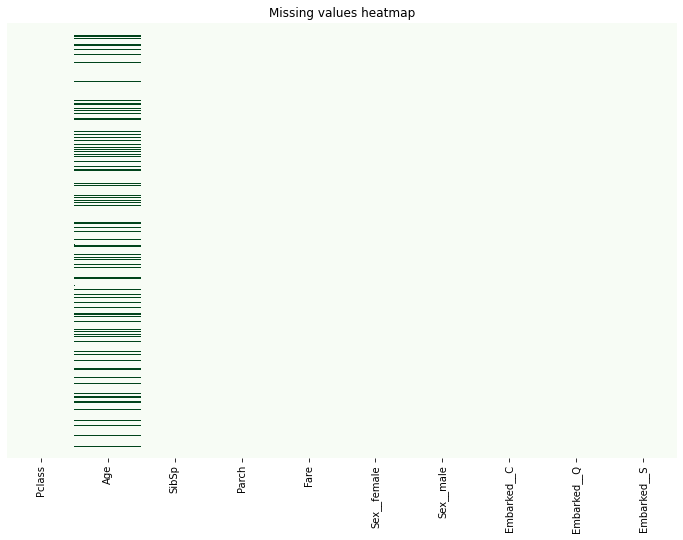

In [156]:
plt.figure(figsize=(12,8))
plt.title("Missing values heatmap")
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='Greens')

In [157]:
imputer = KNNImputer(n_neighbors=5)
imputer.fit(X)

KNNImputer()

In [158]:
X=imputer.transform(X)
d_test = imputer.transform(d_test)

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [160]:
DT = DecisionTreeClassifier(random_state=2343, criterion = 'entropy' , max_depth = 6 , min_samples_split=5)
cross_val_score(DT, X, y, cv=10).mean()

0.8216354556803995

In [161]:
suitable = DecisionTreeClassifier(random_state=2343, criterion = 'entropy' , max_depth = 6 , min_samples_split=5)
suitable.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=5,
                       random_state=2343)

In [162]:
y_pred=suitable.predict(d_test)

###For passenger ID 

In [163]:
data_testPassenger=pd.read_csv("test (1).csv")

In [164]:
pred=pd.DataFrame(y_pred,columns=["Survived"])
pred["PassengerId"]=data_testPassenger["PassengerId"]

In [165]:
pred.head()

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,1,896


In [166]:
pred.to_csv("gender_submission.csv",index=False)